In [15]:
import pandas as pd

#Loading the data into a pandas data frame

df = pd.read_csv('title.ratings.csv')

In [16]:
df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
df.shape

(73856, 3)

In [24]:
#Checking overview of the Data
df.info

<bound method DataFrame.info of            tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]>

In [18]:
#gives statistical sumary of the data

df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [27]:
#Data Cleaning

missing_values = df.isnull() #checks for missing values
missing_counts = df.isnull().sum()
total_missing = df.isnull().sum().sum()
print(missing_values)
print(missing_counts)
print(total_missing)

       tconst  averagerating  numvotes
0       False          False     False
1       False          False     False
2       False          False     False
3       False          False     False
4       False          False     False
...       ...            ...       ...
73851   False          False     False
73852   False          False     False
73853   False          False     False
73854   False          False     False
73855   False          False     False

[73856 rows x 3 columns]
tconst           0
averagerating    0
numvotes         0
dtype: int64
0


In [28]:
# Inspecting Each colum to ensure we are not leaving any missing data behind

for column in df.columns:
    print(f"Unique values in {column}:", df[column].unique())


Unique values in tconst: ['tt10356526' 'tt10384606' 'tt1042974' ... 'tt9851050' 'tt9886934'
 'tt9894098']
Unique values in averagerating: [ 8.3  8.9  6.4  4.2  6.5  6.2  7.   7.2  5.1  5.8  8.   5.5  7.6  5.
  7.4  6.6  5.4  4.   4.4  5.6  6.1  3.4  7.7  4.5  6.3  6.7  8.4  7.8
  5.2  3.6  2.1  2.5  4.6  7.5  5.7  3.5  7.1  8.5  5.3  8.2  3.8  4.9
  6.9  8.6  7.3  4.7  3.2  2.6  3.9  5.9  8.7  6.8  7.9  2.   6.   3.7
  2.4  3.   8.1  4.8  2.8  9.2  4.3  2.9  4.1  1.4  1.9  8.8  9.4  3.3
  9.1  9.7  9.   2.7  1.   3.1  1.7  2.3  9.5  9.3  2.2  1.2  1.1  9.8
  1.8  1.5  9.6  1.6  9.9  1.3 10. ]
Unique values in numvotes: [  31  559   20 ... 9988 5863 4057]


In [23]:
# Checking Data Types
df = pd.read_csv('title.ratings.csv')
print(df.dtypes)

tconst            object
averagerating    float64
numvotes           int64
dtype: object


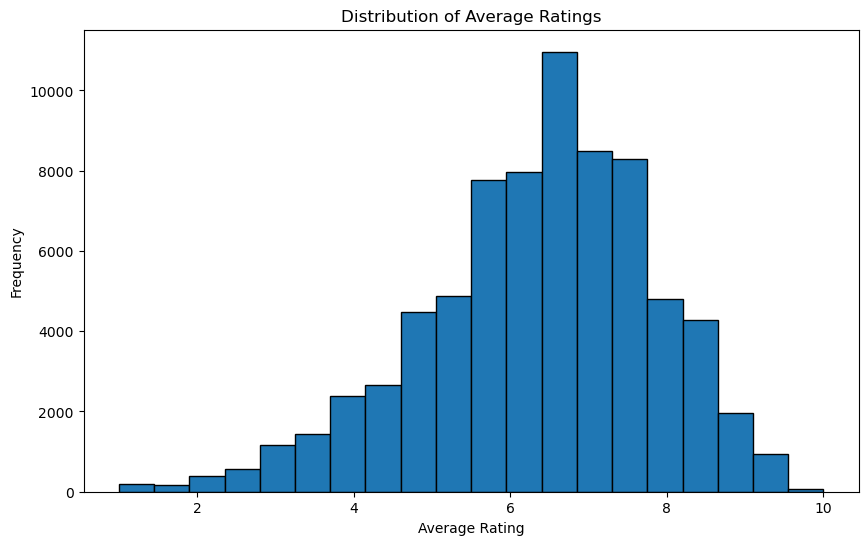

In [24]:
#Data Visualization using Matplotlib

import matplotlib.pyplot as plt

# Create a bar chart of average ratings
plt.figure(figsize=(10, 6))
plt.hist(df['averagerating'], bins=20, edgecolor='k')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


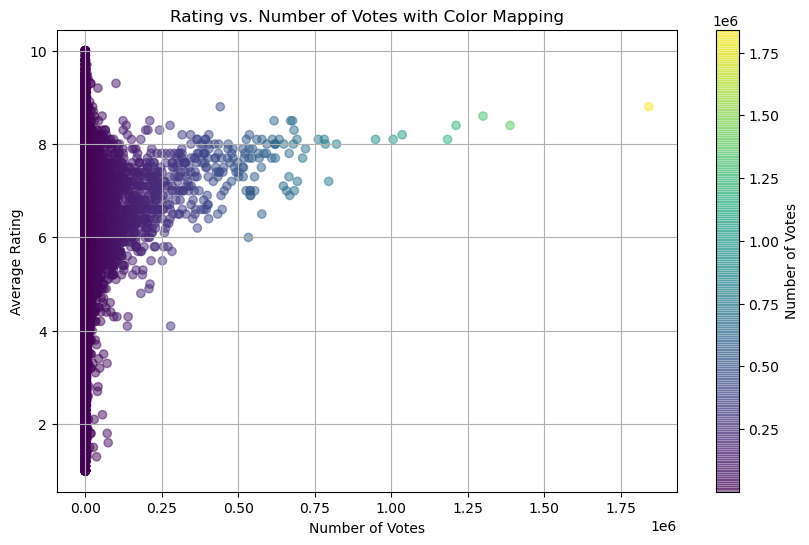

In [22]:
#This scatter plot helps to see if there's a relationship between the number of votes a movie receives and its average rating.

plt.figure(figsize=(10, 6))
plt.scatter(df['numvotes'], df['averagerating'], c=df['numvotes'], cmap='viridis', alpha=0.5)
plt.title('Rating vs. Number of Votes with Color Mapping')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.colorbar(label='Number of Votes')
plt.grid(True)
plt.show()

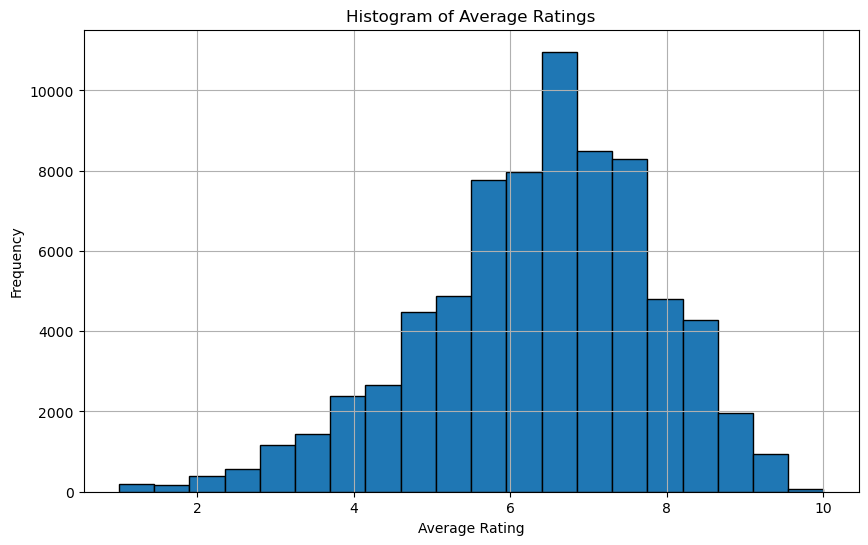

In [25]:
# Creating histogram of average ratings

plt.figure(figsize=(10, 6))
plt.hist(df['averagerating'], bins=20, edgecolor='k')
plt.title('Histogram of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

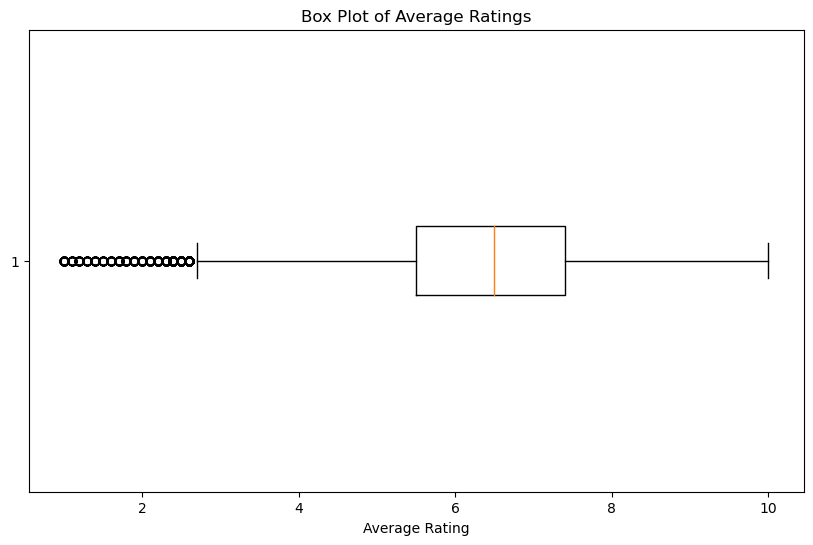

In [26]:
#Creating a Box Plot that shows the distribution of average ratings, including quartiles and potential outliers.

plt.figure(figsize=(10, 6))
plt.boxplot(df['averagerating'], vert=False)
plt.title('Box Plot of Average Ratings')
plt.xlabel('Average Rating')
plt.show()

In [34]:
#Scraping through websites

import requests
from bs4 import BeautifulSoup

# Defining the URL for the movie "After Death" on Box Office Mojo
url = 'https://www.boxofficemojo.com/release/rl1236108033/?ref_=bo_hm_rd'

# Sending an HTTP GET request to the URL
response = requests.get(url)

# Checking if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extracting relevant box office data
    box_office_data = soup.find_all('div', class_='mojo-performance-summary-table')

    # Extracting total gross if available
    total_gross_element = box_office_data[0].find('span', class_='money')
    total_gross = total_gross_element.text if total_gross_element else 'Data not available'

    # Initializing opening weekend as "Data not available" in case it's missing
    opening_weekend = 'Data not available'

    # Checking if the box_office_data list contains an opening weekend element
    if len(box_office_data) > 1:
        opening_weekend_element = box_office_data[1].find('span', class_='money')
        if opening_weekend_element:
            opening_weekend = opening_weekend_element.text

    print(f"Total Gross: {total_gross}")
    print(f"Opening Weekend: {opening_weekend}")
else:
    print("Failed to retrieve data from the website.")


Total Gross: $6,129,073
Opening Weekend: Data not available


In [40]:
from textblob import TextBlob

# Analyzing sentiments of user reviews for a specific movie
user_reviews = ['Great movie!', 'Terrible acting...', 'Loved it!']
sentiment_scores = [TextBlob(review).sentiment.polarity for review in user_reviews]

# Interpreting sentiment scores for insights
for i, review in enumerate(user_reviews):
    print(f"Review {i + 1}: '{review}'")
    print(f"Sentiment Score: {sentiment_scores[i]}")
    if sentiment_scores[i] > 0:
        sentiment = 'Positive'
    elif sentiment_scores[i] < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    print(f"Sentiment: {sentiment}\n")

    #Understanding user sentiment in reviews can provide insights into the audience's emotional response to the movies in your dataset.

Review 1: 'Great movie!'
Sentiment Score: 1.0
Sentiment: Positive

Review 2: 'Terrible acting...'
Sentiment Score: -0.5
Sentiment: Negative

Review 3: 'Loved it!'
Sentiment Score: 0.875
Sentiment: Positive

